# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

# 项目目标：搭建一个模型来预测该顾客是否会对推送做出反应

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
df_portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
df_profile = pd.read_json('data/profile.json', orient='records', lines=True)
df_transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Step1 - 观察数据

In [3]:
#Observe portfolio data
df_portfolio.head(2)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10


In [4]:
df_portfolio.describe().applymap(lambda x:'%.0f' % x)

,difficulty,duration,reward
count,10,10,10
mean,8,6,4
std,6,2,4
min,0,3,0
25%,5,5,2
50%,8,7,4
75%,10,7,5
max,20,10,10


In [5]:
portfolio_groupby_type = df_portfolio.groupby('offer_type')['id'].count()/df_portfolio.id.count()
portfolio_groupby_type

offer_type
bogo             0.4
discount         0.4
informational    0.2
Name: id, dtype: float64

In [6]:
# Observe profile data
df_profile.head(2)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [7]:
#calculate member_days to present customer loyalty
#fix current date (reporting date): 2020/7/20
reporting_date=datetime.strptime('2020/07/20', '%Y/%m/%d')
df_profile['became_member_on']=df_profile.became_member_on.apply(lambda x: datetime.strptime(str(x).split(' ')[0].replace('-',''),'%Y%m%d'))
df_profile['member_days']=df_profile['became_member_on'].apply(lambda x: (reporting_date - x).days)

In [8]:
df_profile.head(2)

,age,became_member_on,gender,id,income,member_days
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,1254
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,1101


In [9]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
age                 17000 non-null int64
became_member_on    17000 non-null datetime64[ns]
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
member_days         17000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 797.0+ KB


In [10]:
df_profile.describe().applymap(lambda x:'%.0f' % x)

,age,income,member_days
count,17000,14825,17000
mean,63,65405,1242
std,27,21598,411
min,18,30000,725
25%,45,49000,933
50%,58,64000,1083
75%,73,80000,1516
max,118,120000,2548


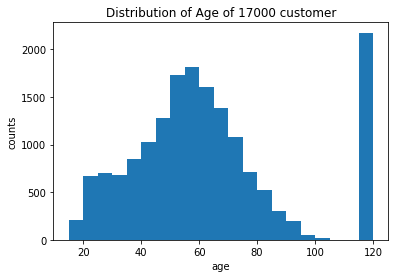

In [11]:
# distribution by age
y = df_profile.age.dropna().tolist()
plt.hist(y,bins=np.arange(15,125,5))
plt.xlabel('age')
plt.ylabel('counts')
plt.title('Distribution of Age of '+str(len(y))+' customer')
plt.show()

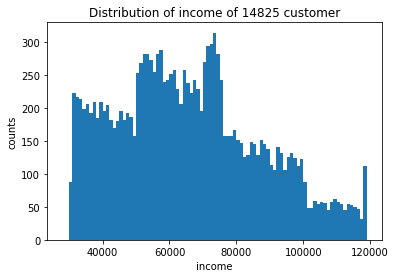

In [12]:
# distribution by customer incomes
y = df_profile.income.dropna().tolist()
plt.hist(y,bins=np.arange(28000,120000,1000))
plt.xlabel('income')
plt.ylabel('counts')
plt.title('Distribution of income of '+str(len(y))+' customer')
plt.show()

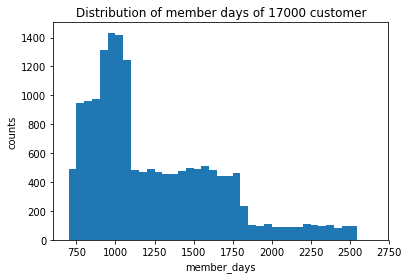

In [13]:
# distribution by customer member days
y = df_profile.member_days.dropna().tolist()
plt.hist(y,bins=np.arange(700,2700,50))
plt.xlabel('member_days')
plt.ylabel('counts')
plt.title('Distribution of member days of '+str(len(y))+' customer')
plt.show()

In [14]:
# abnormal data
print('In Profile Dataset is customer information unique?：{}'.format(df_profile.shape[0]==len(df_profile.id.unique())))
print('There are {} customer more than 110 years old'.format(len(np.where(df_profile['age']>110)[0])))
print('There are {} customer not register incomes'.format(df_profile.id.count()-df_profile.income.dropna().count()))

In Profile Dataset is customer information unique?：True
There are 2175 customer more than 110 years old
There are 2175 customer not register incomes


In [15]:
# delete records which has income = nan or its customer age > 110
df_profile['age'] = np.where(df_profile['age']>110, np.nan, 1)
df_profile = df_profile.dropna(axis=0,how='any')

In [16]:
df_profile.id.count() == 17000-2175

True

In [17]:
# observe dataset transcript
df_transcript.head(2)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [18]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


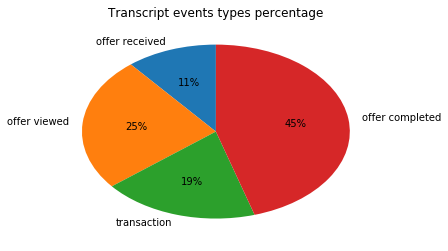

In [19]:
df_por_event=df_transcript.groupby('event').count()
fig=plt.figure()
labels=df_transcript.event.unique().tolist()
values=df_por_event['person'].tolist()
plt.pie(values,labels=labels,startangle=90,shadow=False,autopct='%1.0f%%')
plt.title('Transcript events types percentage')
plt.show()

Step2 - 准备训练数据

In [20]:
# Target customer: 收到推送，并在有效期内看到，消费的顾客
# merge df_profile with view_event, find customer who viewed offers
view_event = df_transcript[df_transcript['event']=='offer viewed']
view_event_addid = view_event.copy()
view_event_addid.loc[:,'offer_id'] = view_event['value'].apply(lambda x: x.get('offer id'))
view_event_addid.drop(columns=['value','event'],inplace=True)
df_profile.rename(columns={'id':'person'},inplace=True)
viewed_profile_customer = pd.merge(df_profile, view_event_addid, how='right',on='person')
viewed_customer_list = viewed_profile_customer[['person']]


In [25]:
df_portfolio.rename(columns={'id':'offer_id'},inplace=True)
viewed_profile_customer.rename(columns={'time':'offer_view_time'},inplace=True)
viewed_profile_customer_addoffer = pd.merge(viewed_profile_customer,df_portfolio,how='inner',on='offer_id')

In [30]:
viewed_profile_customer_addoffer.dropna(inplace=True)
viewed_profile_customer_addoffer.count()

age                 49860
became_member_on    49860
gender              49860
person              49860
income              49860
member_days         49860
offer_view_time     49860
offer_id            49860
channels            49860
difficulty          49860
duration            49860
offer_type          49860
reward              49860
dtype: int64

In [31]:
viewed_profile_customer_addoffer.head(2)

,age,became_member_on,gender,person,income,member_days,offer_view_time,offer_id,channels,difficulty,duration,offer_type,reward
0,1.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1168.0,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5,7,bogo,5
1,1.0,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,816.0,420,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5,7,bogo,5


In [41]:
# Merge transaction event data with viewd_customer, to find the customer who viewd offers an made transacton too
trans_event = df_transcript[df_transcript['event']=='transaction']
trans_event_addamount = trans_event.copy()
trans_event_addamount.loc[:,'amount'] = trans_event_addamount['value'].apply(lambda x: x.get('amount'))
trans_event_addamount.rename(columns={'time':'trans_time'},inplace=True)
viewed_trans_customer = pd.merge(trans_event_addamount, viewed_profile_customer_addoffer, how='right', on='person')
viewed_trans_customer.drop(columns=['value','event'],inplace=True)

In [46]:
viewed_trans_customer.head(2)

,person,trans_time,amount,age,became_member_on,gender,income,member_days,offer_view_time,offer_id,channels,difficulty,duration,offer_type,reward
0,02c083884c7d45b39cc68e1314fec56c,0.0,0.83,1.0,2016-07-11,F,30000.0,1470.0,0,ae264e3637204a6fb9bb56bc8210ddfd,"[email, mobile, social]",10,7,bogo,10
1,02c083884c7d45b39cc68e1314fec56c,6.0,1.44,1.0,2016-07-11,F,30000.0,1470.0,0,ae264e3637204a6fb9bb56bc8210ddfd,"[email, mobile, social]",10,7,bogo,10


In [48]:
viewed_trans_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438546 entries, 0 to 438545
Data columns (total 15 columns):
person              438546 non-null object
trans_time          437410 non-null float64
amount              437410 non-null float64
age                 438546 non-null float64
became_member_on    438546 non-null datetime64[ns]
gender              438546 non-null object
income              438546 non-null float64
member_days         438546 non-null float64
offer_view_time     438546 non-null int64
offer_id            438546 non-null object
channels            438546 non-null object
difficulty          438546 non-null int64
duration            438546 non-null int64
offer_type          438546 non-null object
reward              438546 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 53.5+ MB


In [91]:
selected_customer_trans = viewed_trans_customer[['person','age','gender','income','member_days','offer_type','offer_view_time','duration','trans_time']]


In [92]:
selected_customer_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438546 entries, 0 to 438545
Data columns (total 9 columns):
person             438546 non-null object
age                438546 non-null float64
gender             438546 non-null object
income             438546 non-null float64
member_days        438546 non-null float64
offer_type         438546 non-null object
offer_view_time    438546 non-null int64
duration           438546 non-null int64
trans_time         437410 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 33.5+ MB


In [93]:
selected_customer_trans.describe()

,age,income,member_days,offer_view_time,duration,trans_time
count,438546.0,438546.000000,438546.000000,438546.000000,438546.000000,437410.000000
mean,1.0,62253.318922,1358.785564,352.204882,6.382525,380.635893
std,0.0,20346.994337,435.428619,199.819736,2.146977,201.669829
min,1.0,30000.000000,725.000000,0.000000,3.000000,0.000000
25%,1.0,47000.000000,1002.000000,180.000000,5.000000,210.000000
50%,1.0,60000.000000,1281.000000,396.000000,7.000000,402.000000
75%,1.0,74000.000000,1640.000000,516.000000,7.000000,552.000000
max,1.0,120000.000000,2548.000000,714.000000,10.000000,714.000000


In [112]:
# 筛选出transition发生在看到offer后，并在offer期限内的目标用户
selected_customer_trans_add_lable = selected_customer_trans.copy()
selected_customer_trans_add_lable.loc[:,'target_customer'] = np.where(selected_customer_trans['trans_time']<(selected_customer_trans['offer_view_time']+selected_customer_trans['duration']*24),'yes','no')

In [113]:
# 保留需要的person数据，offer类型和是否是target customer的标签作为后一步机器学习的数据
prepared_dataset = selected_customer_trans_add_lable.drop(['offer_view_time', 'duration','trans_time'], axis=1)
prepared_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438546 entries, 0 to 438545
Data columns (total 7 columns):
person             438546 non-null object
age                438546 non-null float64
gender             438546 non-null object
income             438546 non-null float64
member_days        438546 non-null float64
offer_type         438546 non-null object
target_customer    438546 non-null object
dtypes: float64(3), object(4)
memory usage: 26.8+ MB


In [114]:
prepared_dataset_dummy = pd.get_dummies(prepared_dataset, dummy_na=False, columns=['offer_type','gender','target_customer'],drop_first=False).drop(['gender_O'],axis=1)
prepared_dataset_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 438546 entries, 0 to 438545
Data columns (total 11 columns):
person                      438546 non-null object
age                         438546 non-null float64
income                      438546 non-null float64
member_days                 438546 non-null float64
offer_type_bogo             438546 non-null uint8
offer_type_discount         438546 non-null uint8
offer_type_informational    438546 non-null uint8
gender_F                    438546 non-null uint8
gender_M                    438546 non-null uint8
target_customer_no          438546 non-null uint8
target_customer_yes         438546 non-null uint8
dtypes: float64(3), object(1), uint8(7)
memory usage: 19.7+ MB


Step3 - 搭建，训练，评估模型

In [116]:
#分类器：对有一系列特征的客户推送某类型的offer是否有效
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#划分训练集与测试集，测试集的比例为10%
X=prepared_dataset_dummy.drop(columns=['person','target_customer_no','target_customer_yes'],inplace=False)
Y=prepared_dataset_dummy[['target_customer_no','target_customer_yes']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.10)

In [118]:
#训练模型
model=RandomForestClassifier(n_estimators=500,n_jobs=2,oob_score=True,
                             min_samples_split=50,class_weight='balanced')

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
target_names = list(Y_test.columns)
df_Y_pred=pd.DataFrame(Y_pred,columns=list(Y_test.columns))

#分析报告
print(classification_report(Y_test, Y_pred, target_names=list(Y_test.columns)))

                     precision    recall  f1-score   support

 target_customer_no       0.37      0.90      0.53     13759
target_customer_yes       0.87      0.31      0.46     30096

        avg / total       0.72      0.50      0.48     43855



Step4 - 报告总结

项目利用随机森林，把目标客户的性别，收入，年龄，成为会员的天数，以及被推送的类型作为输入
将是否在收到推送后采取了购买行为作为预测目标。
模型结果在数据增多后应该能有进一步的提高。

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Starbucks_Capstone_notebook-zh.ipynb'])